In [51]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [52]:
analysis = scripts.Analysis()

In [53]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_1_1_1_1',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [54]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_1_1_1_1',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [55]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [56]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [57]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [58]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [59]:
fig.display_hrefanchor()

In [60]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [61]:
table_dgdgs.display_hrefanchor()

In [62]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

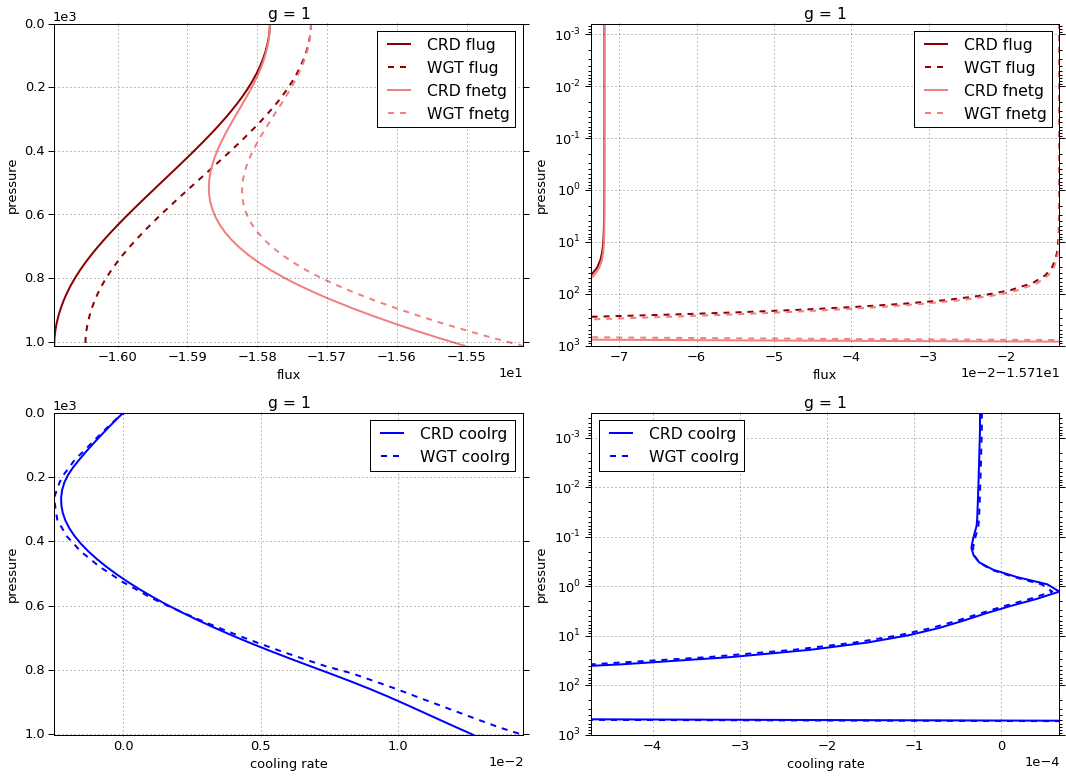

# Figure: flux, cooling rate. g-group 2

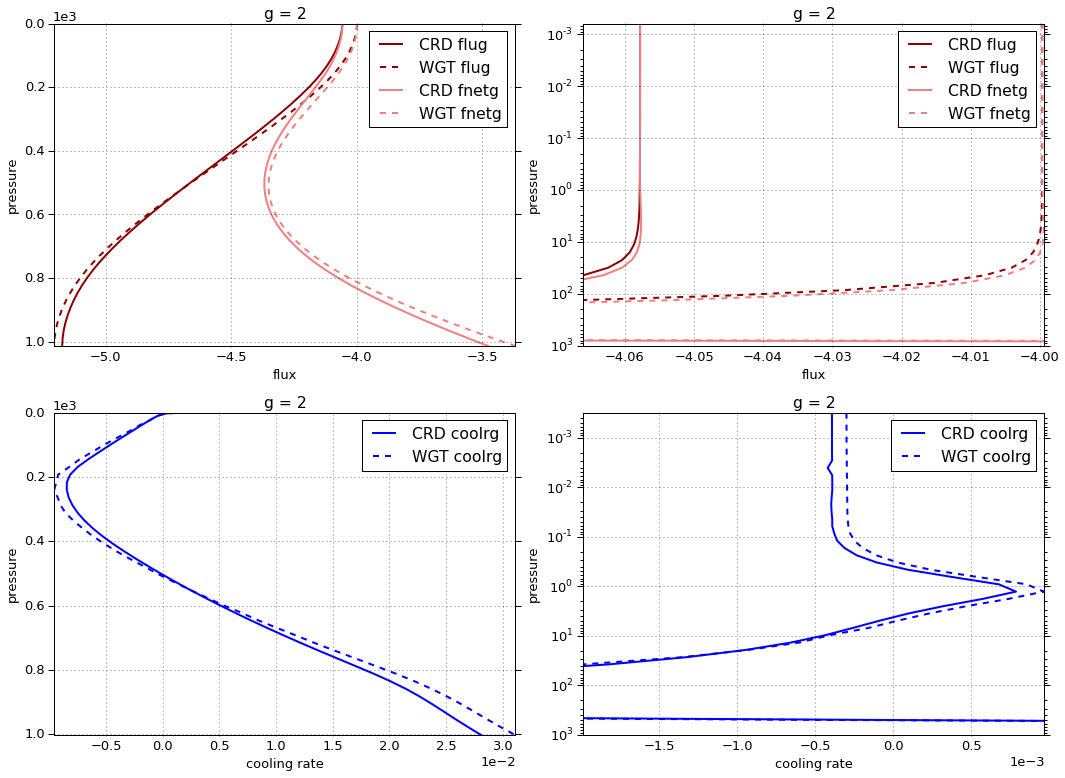

# Figure: flux, cooling rate. g-group 3

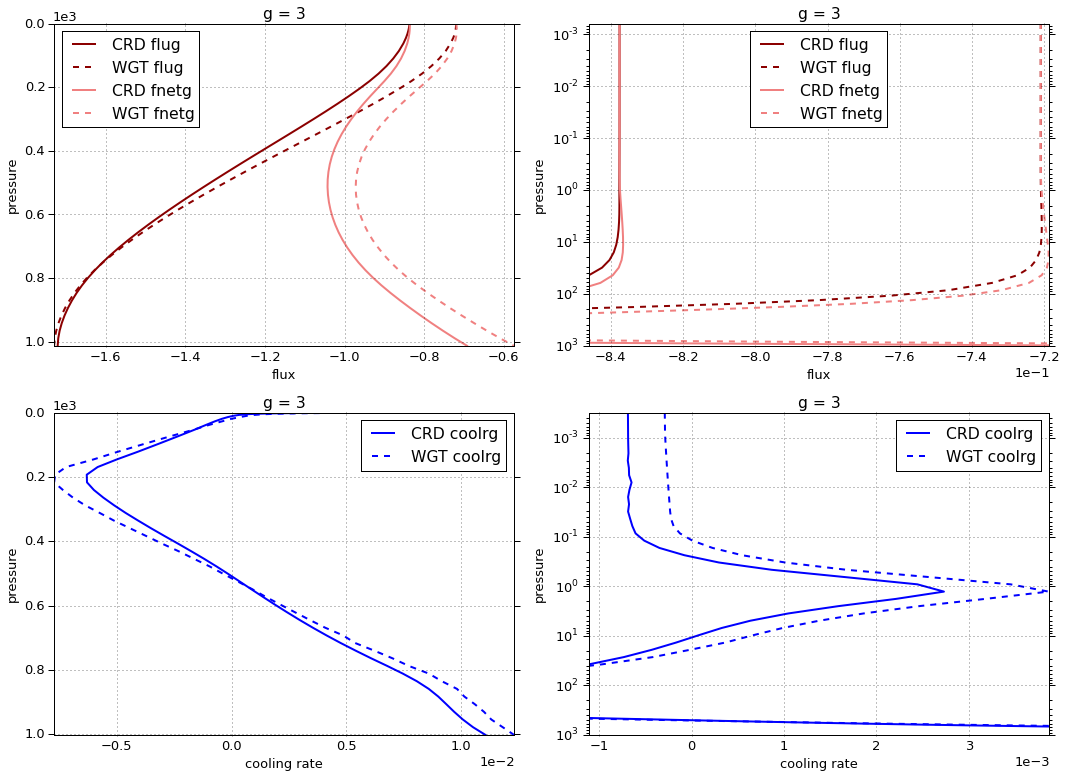

# Figure: flux, cooling rate. g-group 4

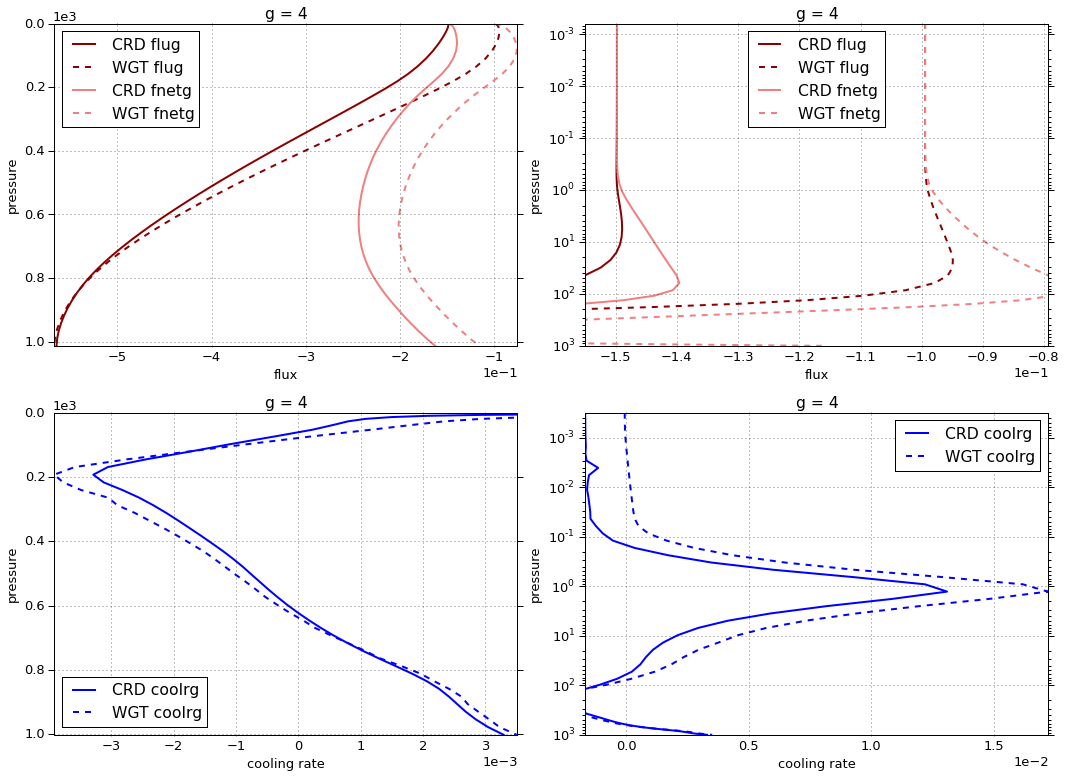

# Figure: flux, cooling rate. g-group 5

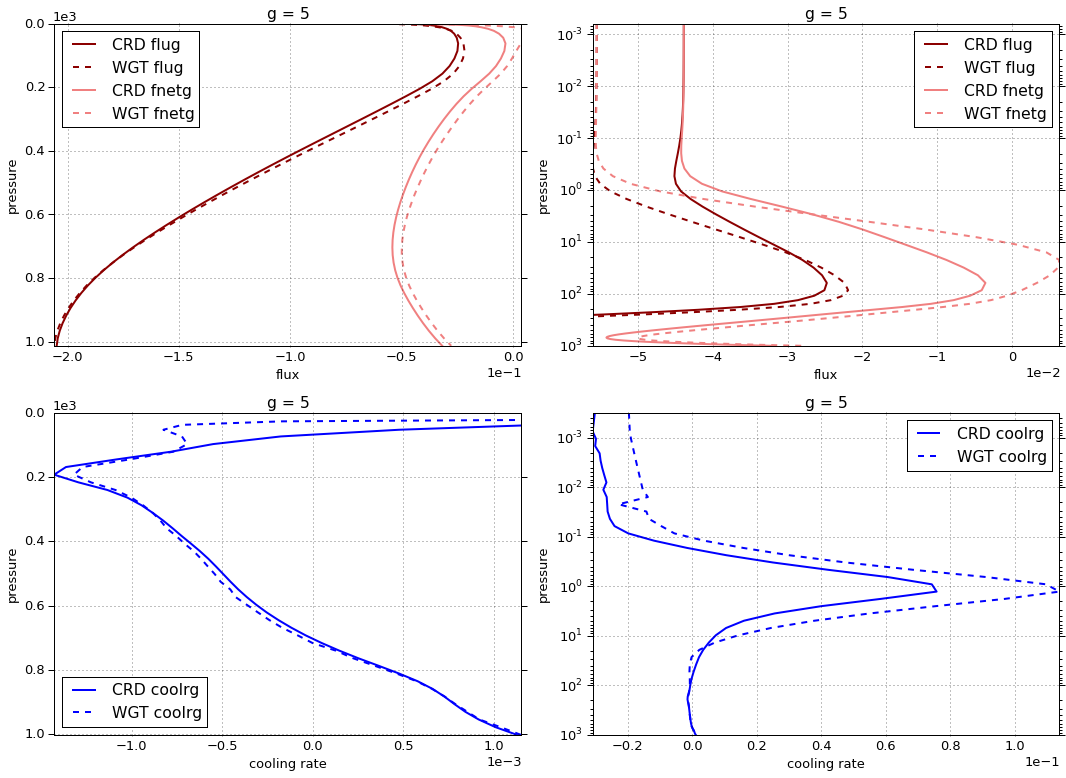

# Figure: flux, cooling rate. g-group total

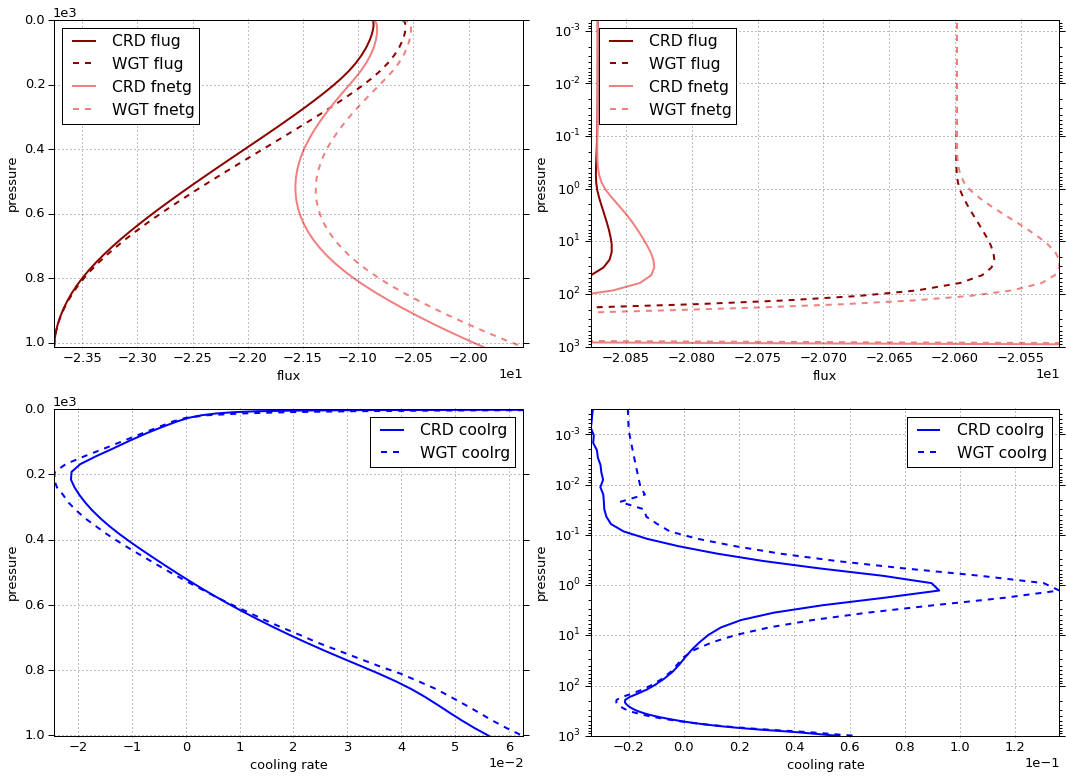

In [63]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [64]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.057822  0.000000  -4.057822
  1013     76     -5.174101  1.696558  -3.477544
3 0        1      -0.837654  0.000000  -0.837654
  1013     76     -1.720822  1.027999  -0.692824
4 0        1      -0.149837  0.000000  -0.149837
  1013     76     -0.564452  0.401463  -0.162989
5 0        1      -0.043910  0.000000  -0.043910
  1013     76     -0.204857  0.172943  -0.031914


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.723096  0.000000 -15.723096
  1013     76    -16.046320  0.626262 -15.420058
2 0        1      -3.999643  0.000000  -3.999643
  1013     76     -5.206227  1.835530  -3.370697
3 0        1      -0.720922  0.000000  -0.720922
  1013     76     -1.729673  1.154343  -0.575330
4 0        1      -0.099441  0.000000  -0.099441
  1013     76     -0.566958  0.450640  -0.116318
5 0        1      -0.055570  0.000000  -0.055570
  1013     76     -0.205993  0.178108  -0.027884


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058867  0.000000  0.058867
  1013     76     0.044618  0.038234  0.082852
2 0        1      0.058180  0.000000  0.058180
  1013     76    -0.032126  0.138972  0.106846
3 0        1      0.116732  0.000000  0.116732
  1013     76    -0.008851  0.126344  0.117493
4 0        1      0.050396  0.000000  0.050396
  1013     76    -0.002506  0.049177  0.046671
5 0        1     -0.011659  0.000000 -0.011659
  1013     76    -0.001136  0.005165  0.004029

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000393
  1001.112500 75     0.028060
3 0.000312    1     -0.000688
  1001.112500 75     0.011055
4 0.000312    1     -0.001683
  1001.112500 75     0.003296
5 0.000312    1     -0.030129
  1001.112500 75     0.001127


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014516
2 0.000312    1     -0.000300
  1001.112500 75     0.031055
3 0.000312    1     -0.000289
  1001.112500 75     0.012301
4 0.000312    1     -0.000070
  1001.112500 75     0.003507
5 0.000312    1     -0.019588
  1001.112500 75     0.001149


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001795
2 0.000312    1      0.000093
  1001.112500 75     0.002995
3 0.000312    1      0.000399
  1001.112500 75     0.001246
4 0.000312    1      0.001613
  1001.112500 75     0.000211
5 0.000312    1      0.010541
  1001.112500 75     0.000022

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871187,0.00000,-20.871187
1013,76,-23.755171,3.88699,-19.868180



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.598672,0.000000,-20.598672
1013,76,-23.755171,4.244882,-19.510288



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.272515,0.000000,0.272515
1013,76,0.000000,0.357892,0.357892


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032917
1001.112500,75,0.056259



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.020270
1001.112500,75,0.062527



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.012647
1001.112500,75,0.006269


In [65]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.211758,0.219162
3,0.070636,0.072812
4,0.023212,0.023867
5,0.008394,0.008671


In [66]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.781963  0.000000e+00 -15.781963   1     1   
0.000624      1     2 -15.781963  2.003504e-10 -15.781963   1     2   
0.000876      1     3 -15.781963  2.826021e-10 -15.781963   1     3   
0.001229      1     4 -15.781963  4.014060e-10 -15.781963   1     4   
0.001723      1     5 -15.781963  5.741030e-10 -15.781963   1     5   
0.002417      1     6 -15.781963  8.251961e-10 -15.781963   1     6   
0.003391      1     7 -15.781963  1.190350e-09 -15.781963   1     7   
0.004757      1     8 -15.781963  1.721467e-09 -15.781963   1     8   
0.006672      1     9 -15.781963  2.494083e-09 -15.781963   1     9   
0.009359      1    10 -15.781963  3.618367e-09 -15.781963   1    10   
0.013128      1    11 -15.781963  5.255029e-09 -15.781963   1    11   
0.018415      1    12 -15.781963  7.638962e-09 -15.781963   1    12   
0.025830      1    13 -15.781963  1.111411e-08 -15.781963   1    13   
0.036232      1    14 -15.781963  1.618716e-08 -15.781963   1    14   
0.050823      1    15 -15.781963  2.368648e-08 -15.781963   1    15   
0.071291      1    16 -15.781963  3.567964e-08 -15.781963   1    16   
0.100000      1    17 -15.781964  5.822270e-08 -15.781963   1    17   
0.140271      1    18 -15.781964  1.057814e-07 -15.781964   1    18   
0.196760      1    19 -15.781964  2.085399e-07 -15.781964   1    19   
0.275997      1    20 -15.781965  4.310448e-07 -15.781964   1    20   
0.387100      1    21 -15.781965  9.126918e-07 -15.781965   1    21   
0.543100      1    22 -15.781967  1.955121e-06 -15.781965   1    22   
0.761700      1    23 -15.781968  4.175870e-06 -15.781964   1    23   
1.068500      1    24 -15.781971  8.476286e-06 -15.781962   1    24   
1.498800      1    25 -15.781974  1.511438e-05 -15.781959   1    25   
2.102400      1    26 -15.781979  2.314455e-05 -15.781956   1    26   
2.949000      1    27 -15.781987  3.241802e-05 -15.781955   1    27   
4.136600      1    28 -15.782001  4.336464e-05 -15.781958   1    28   
5.802500      1    29 -15.782023  5.695675e-05 -15.781966   1    29   
8.139200      1    30 -15.782061  7.490938e-05 -15.781986   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.856694  1.667641e-02 -15.840018   1    47   
347.300000    1    48 -15.866811  2.089630e-02 -15.845915   1    48   
371.075000    1    49 -15.877296  2.588300e-02 -15.851413   1    49   
394.850000    1    50 -15.888087  3.169771e-02 -15.856389   1    50   
418.625000    1    51 -15.899117  3.839908e-02 -15.860718   1    51   
442.400000    1    52 -15.910328  4.604007e-02 -15.864288   1    52   
466.175000    1    53 -15.921658  5.466656e-02 -15.866991   1    53   
489.950000    1    54 -15.933054  6.432206e-02 -15.868732   1    54   
513.725000    1    55 -15.944458  7.504653e-02 -15.869411   1    55   
537.500000    1    56 -15.955816  8.687433e-02 -15.868942   1    56   
561.275000    1    57 -15.967071  9.984574e-02 -15.867225   1    57   
585.050000    1    58 -15.978165  1.139959e-01 -15.864169   1    58   
608.825000    1    59 -15.989040  1.293595e-01 -15.859681   1    59   
632.600000    1    60 -15.999636  1.459726e-01 -15.853663   1    60   
656.375000    1    61 -16.009891  1.638637e-01 -15.846027   1    61   
680.150000    1    62 -16.019745  1.830612e-01 -15.836683   1    62   
703.925000    1    63 -16.029136  2.035880e-01 -15.825548   1    63   
727.700000    1    64 -16.038003  2.254694e-01 -15.812533   1    64   
751.475000    1    65 -16.046283  2.487245e-01 -15.797558   1    65   
775.250000    1    66 -16.053920  2.733716e-01 -15.780549   1    66   
799.025000    1    67 -16.060863  2.994112e-01 -15.761452   1    67   
822.800000    1    68 -16.067076  3.268266e-01 -15.740249   1    68   
846.575000    1    69 -16.072547  3.

In [67]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.057822  0.000000e+00 -4.057822   2     1 -3.999643   
0.000624      2     2 -4.057822  3.866397e-09 -4.057822   2     2 -3.999643   
0.000876      2     3 -4.057822  5.447713e-09 -4.057822   2     3 -3.999643   
0.001229      2     4 -4.057822  7.713832e-09 -4.057822   2     4 -3.999643   
0.001723      2     5 -4.057822  1.098060e-08 -4.057822   2     5 -3.999643   
0.002417      2     6 -4.057822  1.569063e-08 -4.057822   2     6 -3.999643   
0.003391      2     7 -4.057822  2.248253e-08 -4.057822   2     7 -3.999643   
0.004757      2     8 -4.057823  3.227715e-08 -4.057823   2     8 -3.999643   
0.006672      2     9 -4.057823  4.640199e-08 -4.057823   2     9 -3.999643   
0.009359      2    10 -4.057823  6.677390e-08 -4.057823   2    10 -3.999643   
0.013128      2    11 -4.057823  9.615939e-08 -4.057823   2    11 -3.999643   
0.018415      2    12 -4.057823  1.385553e-07 -4.057823   2    12 -3.999644   
0.025830      2    13 -4.057824  1.997387e-07 -4.057824   2    13 -3.999644   
0.036232      2    14 -4.057824  2.880969e-07 -4.057824   2    14 -3.999645   
0.050823      2    15 -4.057825  4.171293e-07 -4.057825   2    15 -3.999645   
0.071291      2    16 -4.057826  6.174424e-07 -4.057826   2    16 -3.999646   
0.100000      2    17 -4.057828  9.679262e-07 -4.057827   2    17 -3.999647   
0.140271      2    18 -4.057830  1.638364e-06 -4.057829   2    18 -3.999649   
0.196760      2    19 -4.057834  2.950866e-06 -4.057831   2    19 -3.999652   
0.275997      2    20 -4.057838  5.529308e-06 -4.057833   2    20 -3.999655   
0.387100      2    21 -4.057845  1.060129e-05 -4.057834   2    21 -3.999660   
0.543100      2    22 -4.057853  2.059440e-05 -4.057833   2    22 -3.999665   
0.761700      2    23 -4.057863  4.001798e-05 -4.057823   2    23 -3.999670   
1.068500      2    24 -4.057873  7.493145e-05 -4.057798   2    24 -3.999674   
1.498800      2    25 -4.057886  1.275269e-04 -4.057758   2    25 -3.999677   
2.102400      2    26 -4.057909  1.919932e-04 -4.057717   2    26 -3.999687   
2.949000      2    27 -4.057952  2.672301e-04 -4.057685   2    27 -3.999715   
4.136600      2    28 -4.058027  3.555799e-04 -4.057671   2    28 -3.999770   
5.802500      2    29 -4.058152  4.627979e-04 -4.057689   2    29 -3.999870   
8.139200      2    30 -4.058360  5.992136e-04 -4.057761   2    30 -4.000049   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.369618  8.551076e-02 -4.284108   2    47 -4.340283   
347.300000    2    48 -4.408024  1.044762e-01 -4.303548   2    48 -4.382297   
371.075000    2    49 -4.447167  1.262035e-01 -4.320964   2    49 -4.424990   
394.850000    2    50 -4.486830  1.507828e-01 -4.336047   2    50 -4.468257   
418.625000    2    51 -4.526790  1.782711e-01 -4.348519   2    51 -4.511811   
442.400000    2    52 -4.566858  2.086954e-01 -4.358163   2    52 -4.555485   
466.175000    2    53 -4.606871  2.420642e-01 -4.364807   2    53 -4.599018   
489.950000    2    54 -4.646673  2.783578e-01 -4.368315   2    54 -4.642254   
513.725000    2    55 -4.686122  3.175473e-01 -4.368575   2    55 -4.685104   
537.500000    2    56 -4.725073  3.596000e-01 -4.365474   2    56 -4.727309   
561.275000    2    57 -4.763374  4.044824e-01 -4.358892   2    57 -4.768745   
585.050000    2    58 -4.800869  4.521636e-01 -4.348705   2    58 -4.809173   
608.825000    2    59 -4.837399  5.026014e-01 -4.334798   2    59 -4.848579   
632.600000    2    60 -4.872804  5.557600e-01 -4.317043   2    60 -4.886630   
656.375000    2    61 -4.906916  6.115928e-01 -4.295323   2    61 -4.923252   
680.150000    2    62 -4.939564  6.700429e-01 -4.269521   2    62 -4.958232   
703.925000    2    63 -4.970572  7.310537e-01 -4.239518   2   

In [68]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.837654  0.000000e+00 -0.837654   3     1 -0.720922   
0.000624      3     2 -0.837654  1.001237e-08 -0.837654   3     2 -0.720922   
0.000876      3     3 -0.837654  1.410860e-08 -0.837654   3     3 -0.720922   
0.001229      3     4 -0.837654  1.998196e-08 -0.837654   3     4 -0.720922   
0.001723      3     5 -0.837654  2.845403e-08 -0.837654   3     5 -0.720922   
0.002417      3     6 -0.837654  4.067652e-08 -0.837654   3     6 -0.720922   
0.003391      3     7 -0.837654  5.831183e-08 -0.837654   3     7 -0.720922   
0.004757      3     8 -0.837654  8.375828e-08 -0.837654   3     8 -0.720922   
0.006672      3     9 -0.837655  1.204747e-07 -0.837654   3     9 -0.720922   
0.009359      3    10 -0.837655  1.734571e-07 -0.837655   3    10 -0.720923   
0.013128      3    11 -0.837655  2.499181e-07 -0.837655   3    11 -0.720923   
0.018415      3    12 -0.837656  3.602794e-07 -0.837655   3    12 -0.720923   
0.025830      3    13 -0.837657  5.196045e-07 -0.837656   3    13 -0.720923   
0.036232      3    14 -0.837658  7.497592e-07 -0.837657   3    14 -0.720924   
0.050823      3    15 -0.837659  1.085964e-06 -0.837658   3    15 -0.720925   
0.071291      3    16 -0.837661  1.608559e-06 -0.837660   3    16 -0.720926   
0.100000      3    17 -0.837664  2.525576e-06 -0.837662   3    17 -0.720927   
0.140271      3    18 -0.837668  4.283450e-06 -0.837664   3    18 -0.720929   
0.196760      3    19 -0.837674  7.722216e-06 -0.837666   3    19 -0.720930   
0.275997      3    20 -0.837682  1.444941e-05 -0.837667   3    20 -0.720932   
0.387100      3    21 -0.837691  2.757841e-05 -0.837663   3    21 -0.720932   
0.543100      3    22 -0.837700  5.314762e-05 -0.837647   3    22 -0.720926   
0.761700      3    23 -0.837706  1.020960e-04 -0.837604   3    23 -0.720909   
1.068500      3    24 -0.837704  1.887555e-04 -0.837515   3    24 -0.720870   
1.498800      3    25 -0.837695  3.186576e-04 -0.837376   3    25 -0.720804   
2.102400      3    26 -0.837696  4.782802e-04 -0.837218   3    26 -0.720738   
2.949000      3    27 -0.837723  6.645497e-04 -0.837059   3    27 -0.720681   
4.136600      3    28 -0.837793  8.824032e-04 -0.836911   3    28 -0.720642   
5.802500      3    29 -0.837930  1.144216e-03 -0.836785   3    29 -0.720638   
8.139200      3    30 -0.838168  1.472929e-03 -0.836695   3    30 -0.720704   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.108617  1.122379e-01 -0.996379   3    47 -1.034425   
347.300000    3    48 -1.139586  1.317256e-01 -1.007860   3    48 -1.070727   
371.075000    3    49 -1.170758  1.529924e-01 -1.017765   3    49 -1.107171   
394.850000    3    50 -1.201982  1.759463e-01 -1.026036   3    50 -1.143605   
418.625000    3    51 -1.233101  2.004570e-01 -1.032644   3    51 -1.179851   
442.400000    3    52 -1.263999  2.263814e-01 -1.037617   3    52 -1.215725   
466.175000    3    53 -1.294588  2.535927e-01 -1.040995   3    53 -1.251173   
489.950000    3    54 -1.324789  2.819443e-01 -1.042844   3    54 -1.286066   
513.725000    3    55 -1.354540  3.113095e-01 -1.043230   3    55 -1.320335   
537.500000    3    56 -1.383770  3.415760e-01 -1.042194   3    56 -1.353904   
561.275000    3    57 -1.412407  3.726664e-01 -1.039740   3    57 -1.386686   
585.050000    3    58 -1.440364  4.045059e-01 -1.035858   3    58 -1.418581   
608.825000    3    59 -1.467550  4.370240e-01 -1.030526   3    59 -1.449480   
632.600000    3    60 -1.493871  4.701709e-01 -1.023700   3    60 -1.479292   
656.375000    3    61 -1.519226  5.038874e-01 -1.015339   3    61 -1.507888   
680.150000    3    62 -1.543505  5.381294e-01 -1.005376   3    62 -1.535159   
703.925000    3    63 -1.566589  5.728440e-01 -0.993745   3   

In [69]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.149837  0.000000e+00 -0.149837   4     1 -0.099441   
0.000624      4     2 -0.149837  4.259490e-08 -0.149837   4     2 -0.099441   
0.000876      4     3 -0.149837  6.003757e-08 -0.149837   4     3 -0.099441   
0.001229      4     4 -0.149837  8.509688e-08 -0.149837   4     4 -0.099441   
0.001723      4     5 -0.149838  1.213178e-07 -0.149837   4     5 -0.099441   
0.002417      4     6 -0.149838  1.736758e-07 -0.149838   4     6 -0.099441   
0.003391      4     7 -0.149838  2.493629e-07 -0.149838   4     7 -0.099441   
0.004757      4     8 -0.149838  3.587674e-07 -0.149838   4     8 -0.099441   
0.006672      4     9 -0.149839  5.168871e-07 -0.149838   4     9 -0.099442   
0.009359      4    10 -0.149840  7.454013e-07 -0.149839   4    10 -0.099442   
0.013128      4    11 -0.149841  1.075618e-06 -0.149840   4    11 -0.099442   
0.018415      4    12 -0.149842  1.552769e-06 -0.149841   4    12 -0.099442   
0.025830      4    13 -0.149844  2.242177e-06 -0.149842   4    13 -0.099443   
0.036232      4    14 -0.149847  3.238501e-06 -0.149844   4    14 -0.099443   
0.050823      4    15 -0.149851  4.694075e-06 -0.149846   4    15 -0.099444   
0.071291      4    16 -0.149856  6.962277e-06 -0.149849   4    16 -0.099445   
0.100000      4    17 -0.149863  1.096888e-05 -0.149852   4    17 -0.099446   
0.140271      4    18 -0.149874  1.867354e-05 -0.149855   4    18 -0.099446   
0.196760      4    19 -0.149887  3.366667e-05 -0.149853   4    19 -0.099443   
0.275997      4    20 -0.149899  6.259207e-05 -0.149837   4    20 -0.099432   
0.387100      4    21 -0.149909  1.178357e-04 -0.149791   4    21 -0.099403   
0.543100      4    22 -0.149903  2.222729e-04 -0.149680   4    22 -0.099338   
0.761700      4    23 -0.149856  4.147525e-04 -0.149441   4    23 -0.099203   
1.068500      4    24 -0.149739  7.417517e-04 -0.148998   4    24 -0.098956   
1.498800      4    25 -0.149547  1.217363e-03 -0.148330   4    25 -0.098584   
2.102400      4    26 -0.149339  1.785485e-03 -0.147553   4    26 -0.098142   
2.949000      4    27 -0.149155  2.421420e-03 -0.146734   4    27 -0.097657   
4.136600      4    28 -0.149026  3.120986e-03 -0.145905   4    28 -0.097147   
5.802500      4    29 -0.148988  3.901017e-03 -0.145087   4    29 -0.096629   
8.139200      4    30 -0.149080  4.801983e-03 -0.144279   4    30 -0.096128   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.288262  7.840017e-02 -0.209862   4    47 -0.245194   
347.300000    4    48 -0.302981  8.769896e-02 -0.215282   4    48 -0.262763   
371.075000    4    49 -0.317628  9.744535e-02 -0.220183   4    49 -0.280208   
394.850000    4    50 -0.332144  1.075787e-01 -0.224566   4    50 -0.297492   
418.625000    4    51 -0.346478  1.180290e-01 -0.228449   4    51 -0.314553   
442.400000    4    52 -0.360584  1.287405e-01 -0.231844   4    52 -0.331320   
466.175000    4    53 -0.374441  1.396546e-01 -0.234786   4    53 -0.347779   
489.950000    4    54 -0.388032  1.507296e-01 -0.237302   4    54 -0.363917   
513.725000    4    55 -0.401351  1.619173e-01 -0.239434   4    55 -0.379681   
537.500000    4    56 -0.414384  1.732105e-01 -0.241174   4    56 -0.395061   
561.275000    4    57 -0.427113  1.845892e-01 -0.242524   4    57 -0.410053   
585.050000    4    58 -0.439514  1.960532e-01 -0.243460   4    58 -0.424595   
608.825000    4    59 -0.451554  2.075903e-01 -0.243963   4    59 -0.438667   
632.600000    4    60 -0.463201  2.192044e-01 -0.243996   4    60 -0.452232   
656.375000    4    61 -0.474419  2.308934e-01 -0.243526   4    61 -0.465251   
680.150000    4    62 -0.485167  2.426496e-01 -0.242517   4    62 -0.477663   
703.925000    4    63 -0.495393  2.544640e-01 -0.240929   4   

In [70]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.043910  0.000000e+00 -0.043910   5     1 -0.055570   
0.000624      5     2 -0.043914  8.110818e-07 -0.043913   5     2 -0.055572   
0.000876      5     3 -0.043915  1.141852e-06 -0.043914   5     3 -0.055573   
0.001229      5     4 -0.043916  1.613323e-06 -0.043915   5     4 -0.055574   
0.001723      5     5 -0.043919  2.289032e-06 -0.043917   5     5 -0.055576   
0.002417      5     6 -0.043922  3.257321e-06 -0.043919   5     6 -0.055578   
0.003391      5     7 -0.043927  4.644524e-06 -0.043922   5     7 -0.055582   
0.004757      5     8 -0.043933  6.630961e-06 -0.043927   5     8 -0.055586   
0.006672      5     9 -0.043942  9.473444e-06 -0.043933   5     9 -0.055593   
0.009359      5    10 -0.043955  1.353739e-05 -0.043941   5    10 -0.055602   
0.013128      5    11 -0.043973  1.934057e-05 -0.043954   5    11 -0.055615   
0.018415      5    12 -0.043998  2.761349e-05 -0.043970   5    12 -0.055632   
0.025830      5    13 -0.044033  3.937962e-05 -0.043993   5    13 -0.055663   
0.036232      5    14 -0.044082  5.604234e-05 -0.044026   5    14 -0.055698   
0.050823      5    15 -0.044150  7.992751e-05 -0.044070   5    15 -0.055746   
0.071291      5    16 -0.044244  1.157390e-04 -0.044128   5    16 -0.055806   
0.100000      5    17 -0.044369  1.740614e-04 -0.044195   5    17 -0.055886   
0.140271      5    18 -0.044527  2.751214e-04 -0.044252   5    18 -0.055977   
0.196760      5    19 -0.044713  4.512046e-04 -0.044262   5    19 -0.056062   
0.275997      5    20 -0.044916  7.537052e-04 -0.044162   5    20 -0.056115   
0.387100      5    21 -0.045097  1.264987e-03 -0.043832   5    21 -0.056068   
0.543100      5    22 -0.045169  2.114874e-03 -0.043055   5    22 -0.055801   
0.761700      5    23 -0.044966  3.480858e-03 -0.041485   5    23 -0.055104   
1.068500      5    24 -0.044282  5.496353e-03 -0.038785   5    24 -0.053722   
1.498800      5    25 -0.042997  8.073198e-03 -0.034924   5    25 -0.051551   
2.102400      5    26 -0.041395  1.065286e-02 -0.030742   5    26 -0.048891   
2.949000      5    27 -0.039621  1.289474e-02 -0.026727   5    27 -0.045929   
4.136600      5    28 -0.037758  1.462967e-02 -0.023129   5    28 -0.042806   
5.802500      5    29 -0.035839  1.588210e-02 -0.019957   5    29 -0.039610   
8.139200      5    30 -0.033868  1.682146e-02 -0.017046   5    30 -0.036405   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.074702  4.115454e-02 -0.033548   5    47 -0.069947   
347.300000    5    48 -0.081400  4.552831e-02 -0.035872   5    48 -0.076868   
371.075000    5    49 -0.088099  5.004893e-02 -0.038050   5    49 -0.083804   
394.850000    5    50 -0.094749  5.466023e-02 -0.040089   5    50 -0.090694   
418.625000    5    51 -0.101326  5.934326e-02 -0.041983   5    51 -0.097524   
442.400000    5    52 -0.107810  6.407494e-02 -0.043735   5    52 -0.104262   
466.175000    5    53 -0.114190  6.883364e-02 -0.045357   5    53 -0.110909   
489.950000    5    54 -0.120457  7.359699e-02 -0.046860   5    54 -0.117445   
513.725000    5    55 -0.126609  7.835956e-02 -0.048250   5    55 -0.123880   
537.500000    5    56 -0.132645  8.311967e-02 -0.049526   5    56 -0.130215   
561.275000    5    57 -0.138558  8.787577e-02 -0.050683   5    57 -0.136394   
585.050000    5    58 -0.144341  9.263432e-02 -0.051706   5    58 -0.142495   
608.825000    5    59 -0.149976  9.739207e-02 -0.052584   5    59 -0.148407   
632.600000    5    60 -0.155453  1.021525e-01 -0.053300   5    60 -0.154163   
656.375000    5    61 -0.160750  1.069167e-01 -0.053834   5    61 -0.159747   
680.150000    5    62 -0.165851  1.116853e-01 -0.054166   5    62 -0.165110   
703.925000    5    63 -0.170730  1.164539e-01 -0.054276   5   

In [71]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')